In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [135]:
datapath="/home/<user>/projects/disentanglement-multi-task/data/dsprites_multitask.npz"

In [2]:
from sklearn.utils import shuffle

test_prec=0.125
val_prec=0.125
seed=123
data = np.load(datapath)
data_images =  data['imgs']
labels = data['multitask_targets'][:, :5]

data_images, labels = shuffle(data_images, labels, random_state=seed)
val_ind = int((1 - (test_prec + val_prec)) * len(data_images))
test_ind = int((1 - test_prec) * len(data_images))

data_npz = data_images[test_ind:]
labels = labels[test_ind:]




NameError: name 'datapath' is not defined

In [257]:
path="/mnt/users/<user>/local/disentanglement-multi-task/test-dane/new/1/test/test_preds.npy"
data = np.load(path).item()
preds1 = data['preds']
trues1 = data['trues']
num = len(preds.keys())

In [258]:
def plot_scatter(trues, preds, ylim=None):
    fig, ax = plt.subplots(2, num, figsize=(5*num, 10), squeeze=False)
    mins = []
    for i in range(num):
        t = trues["y_true{}".format(i)]
        p =  preds["y_pred{}".format(i)].reshape(-1)
        ax[0, i].scatter(t,p)
        ax[0, i].set_ylabel("y_pred")
        ax[0, i].set_xlabel("y_true")
        ax[0, i].set_title("task_{}_{:.3f}".format(i, np.mean((t-p)**2)))
        ax[1, i].hist2d(t,p, bins=50)
        ax[1, i].set_ylabel("y_pred")
        ax[1, i].set_xlabel("y_true")
        #ax[0, i].axis('equal')
        ax[0, i].set_xlim((min(t), max(t)))
        if ylim is None:
            ax[0, i].set_ylim((min(p), max(p)))
            ax[1, i].set_ylim((min(p), max(p)))
        else:
            ax[0, i].set_ylim(ylim[i])
            ax[1, i].set_ylim(ylim[i])
        mins.append((min(p), max(p)))

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
    plt.show()
    return mins

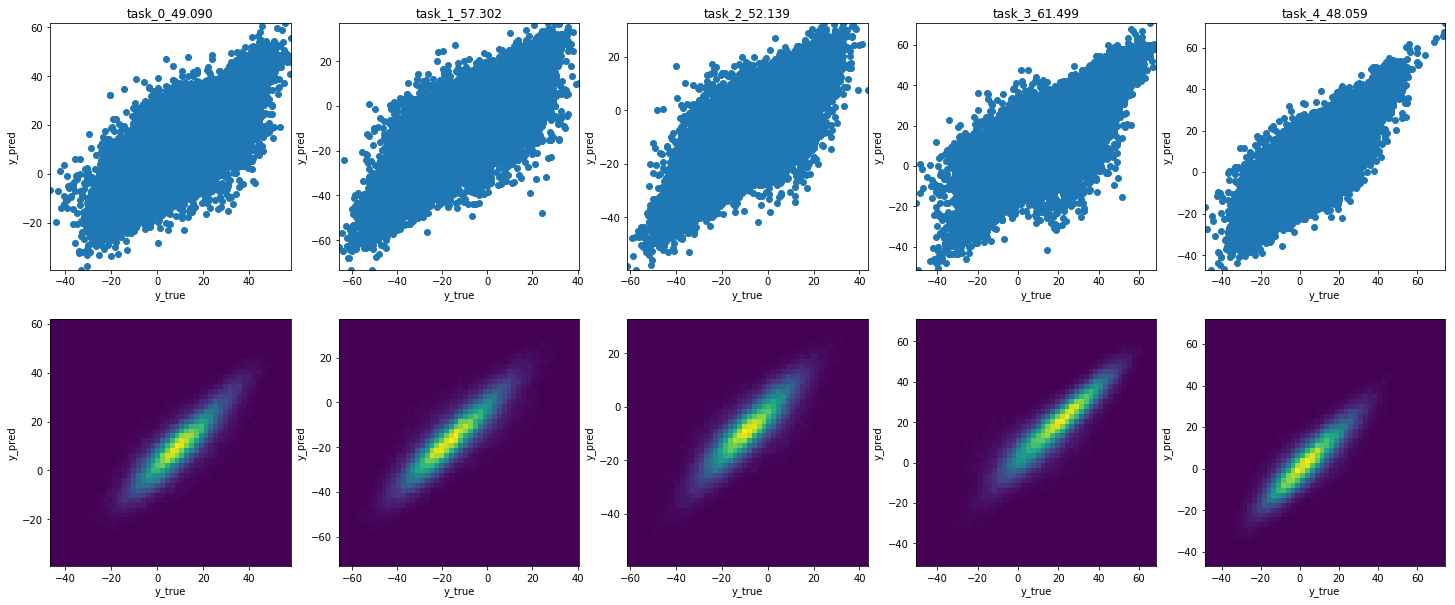

In [259]:
mins = plot_scatter(trues1, preds1)

# From Neptune

In [5]:
import neptune 
import os

In [6]:

session = neptune.Session.with_default_backend(api_token=os.environ["NEPTUNE_API_TOKEN"])
project = session.get_project('<user>/disentanglement-multitask')
exp_set = project.get_experiments(tag=['20200824_test_eval'])

In [7]:
keys = exp_set[0].get_channels().keys()

In [8]:
keys

dict_keys(['test/loss0', 'test/loss1', 'test/loss2', 'test/loss3', 'test/loss4', 'test/eval_IRS', 'test/eval_train_accuracy', 'test/eval_eval_accuracy', 'test/eval_discrete_mig', 'test/eval_weighted_ica_measure', 'test/eval_gaussian_total_correlation', 'test/eval_gaussian_wasserstein_correlation', 'test/eval_gaussian_wasserstein_correlation_norm', 'test/eval_mutual_info_score'])

In [9]:
float(exp_set[0].get_channels()['test/loss0'].y)

49.08976383209229

In [10]:
for exp in exp_set:
    print(exp.get_parameters()["name"])

1_test_eval
2_test_eval
3_test_eval
4_test_eval
5_test_eval
6_test_eval
7_test_eval
8_test_eval
9_test_eval
10_test_eval
11_test_eval
12_test_eval
13_test_eval
14_test_eval
15_test_eval
16_test_eval
17_test_eval
18_test_eval


In [11]:
gathers={"mul":[1,2,3], 1:[4,5,6], 2:[7,8,9], 3:[10,11,12], 4:[13,14,15], 5:[16,17,18]}
def get_accumulated_every(keys, exp_set, gathers):
    res = {}
    for name in gathers:
        exps = [exp_set[i-1] for i in gathers[name]]
        accumulated = {key:[] for key in keys}
        means = {}
        stds = {}
        for exp in exps:
            for key in keys:
                value = float(exp.get_channels()[key].y)
                accumulated[key].append(value)
        for key in accumulated:
            means[key] = np.mean(accumulated[key])
            stds[key] = np.std(accumulated[key])
        res[name]={"mean":means, "std":stds}
    return res

In [12]:
res_dict = get_accumulated_every(keys, exp_set,gathers)

In [13]:
res_dict

{'mul': {'mean': {'test/loss0': 48.98384224573771,
   'test/loss1': 56.16356133708248,
   'test/loss2': 51.6763801574707,
   'test/loss3': 60.06957615039966,
   'test/loss4': 47.59435581984343,
   'test/eval_IRS': 0.507125310456619,
   'test/eval_train_accuracy': 0.36043333333333333,
   'test/eval_eval_accuracy': 0.36493333333333333,
   'test/eval_discrete_mig': 0.01750231210183118,
   'test/eval_weighted_ica_measure': 0.2041366922841689,
   'test/eval_gaussian_total_correlation': 0.3927276973029308,
   'test/eval_gaussian_wasserstein_correlation': 140739.9218306948,
   'test/eval_gaussian_wasserstein_correlation_norm': 0.04852596150295099,
   'test/eval_mutual_info_score': 0.05092833716899797},
  'std': {'test/loss0': 0.38553867184813334,
   'test/loss1': 1.1963588860816823,
   'test/loss2': 0.33175451338738293,
   'test/loss3': 1.3393957196327104,
   'test/loss4': 0.3324031852571605,
   'test/eval_IRS': 0.012109342797681727,
   'test/eval_train_accuracy': 0.024928475462588733,
   'te

In [14]:
new_keys = [key for key in keys if not key.startswith("test/loss")]

In [15]:
new_keys

['test/eval_IRS',
 'test/eval_train_accuracy',
 'test/eval_eval_accuracy',
 'test/eval_discrete_mig',
 'test/eval_weighted_ica_measure',
 'test/eval_gaussian_total_correlation',
 'test/eval_gaussian_wasserstein_correlation',
 'test/eval_gaussian_wasserstein_correlation_norm',
 'test/eval_mutual_info_score']

In [22]:
def plot_every(keys, res_dict, figsize=(20,10)):
    cols = 3
    rows = int(np.ceil(len(keys)/cols))
    width = 0.8
    colors_dict={"mul":'tab:red', 1:'lightgray', 2:'lightgray', 3:'lightgray', 4:'lightgray', 5:'lightgray'}
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    for i, key in enumerate(keys):
        r = i//cols
        c = i%cols
        for j, name in enumerate(res_dict):
            ax[r,c].bar(0+j*(width+0.1), height=res_dict[name]["mean"][key], width=width,
                        yerr=res_dict[name]["std"][key], color=colors_dict[name])
            ax[r,c].set_title(key)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

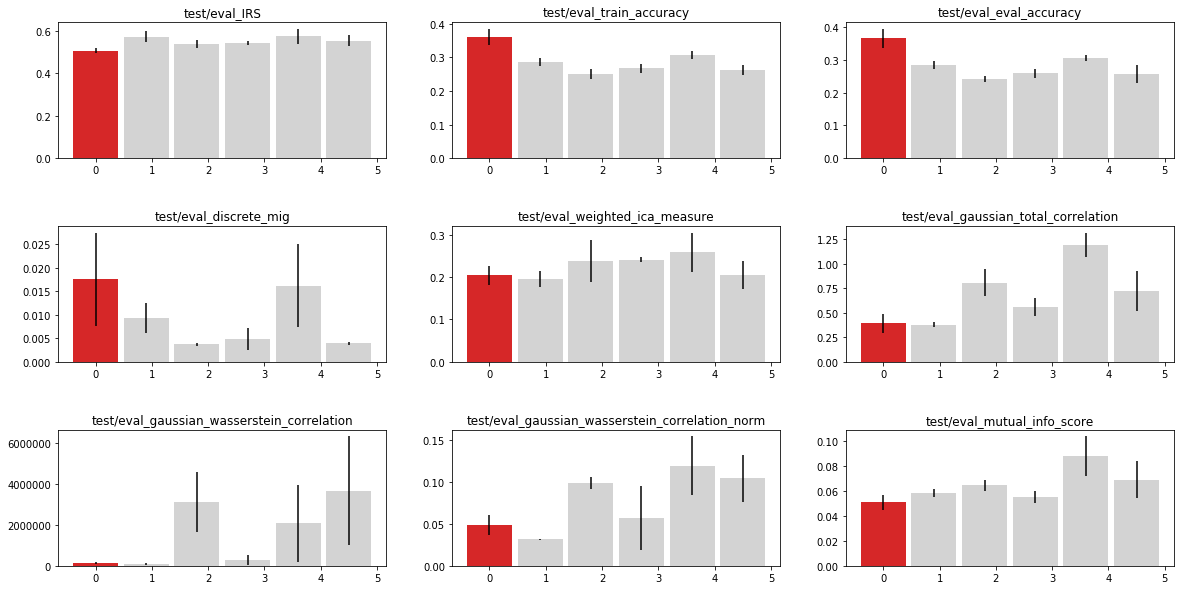

In [23]:
plot_every(new_keys, res_dict)